<a href="https://colab.research.google.com/github/ferrazzijk/Detecting-Heart-Disease/blob/main/Heart_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Detection Introduction**

This dataset contains information based on attributes of a patients with concern of  possible heart disease. The goal is to use the data to predict if a person has a heart disease or not as well as gaining various insights to better understand heart disease.

The dataset is provided complimentary by UGI and can be found [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). 


The dataset was created by: -
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**The dataset contains 14 columns:**

**age:** age in years

**sex:** (1 = male; 0 = female)

**cp:** chest pain type (0=asymptomatic, 1=atypical angina, 2=non-anginal pain, 3=typical angina)

**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

**chol:** serum cholesterol in mg/dl

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg:** resting electrocardiographic results (0=showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1= normal, 2= having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**thalach:** maximum heart rate achieved during a stress test

**exang:** exercise induced angina (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)

**slope:** the slope of the peak exercise ST segment (0= downsloping, 1=flat, 2=upsloping)

**ca:** number of major vessels (0-3) colored by fluoroscopy

**thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect

**target:** 1 (has heart disease) or 0 (does not have heart disease)

# **Table of Contents**
1. [Imports & Reading Dataset ](#1)
2. [Exploratory Data Analysis](#2)
  
  a. [Heart Disease Status Counts](#3)
  
  b. [Heart Disease Status & Maximum Heart Rate Achieved](#4)

  c. [Correlations](#5)
  
  d. [Heart Disease Status & Age](#6)
  
  e. [Chest Pain Exploration](#7)

3. [Classification Model Testing](#8)

  a. [Prep for Model Building](#9)

  b. [Logistic Regression Classifier](#10)

  c. [Random Forest Classifier](#11)

  d. [K-Nearest Neighbors Classifier](#12)

  e. [Support Vector Machine Classifier](#13)

  f. [Gradient Boosting Classifier](#14)

  g. [Ridge Classifier](#15)

4. [Model Comparison](#16)

  a. [Conclusion](#17)

5. [Deployment of Model](#18)

  a. [User Based Form to Detect Heart Disease](#19)

  b. [Flask User Based Form to Detect Heart Disease](#20)

# **Imports & Reading Dataset** <a name="1"></a>

In [ ]:
#set environment

!pip install flask-ngrok

import IPython.display
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import textwrap

from flask import Flask
from flask_ngrok import run_with_ngrok
from IPython.display import display
from scipy.stats import fisher_exact
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import neighbors, metrics, svm, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load and read data
url = 'https://raw.githubusercontent.com/ferrazzijk/Practice_Project_1/main/Heart.csv?=1'
data_df = pd.read_csv(url)

In [ ]:
#view df
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#check for null values
total_missing = data_df.isnull().sum().sort_values(ascending=False)
percent_missing = (data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
target,0,0.0
thal,0,0.0
ca,0,0.0
slope,0,0.0
oldpeak,0,0.0


In [ ]:
#view data types
data_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#view the descriptive statistcs of each column
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# **Exploratory Data Analysis** <a name="2"></a>

## **Heart Disease Status Counts**  <a name="3"></a>

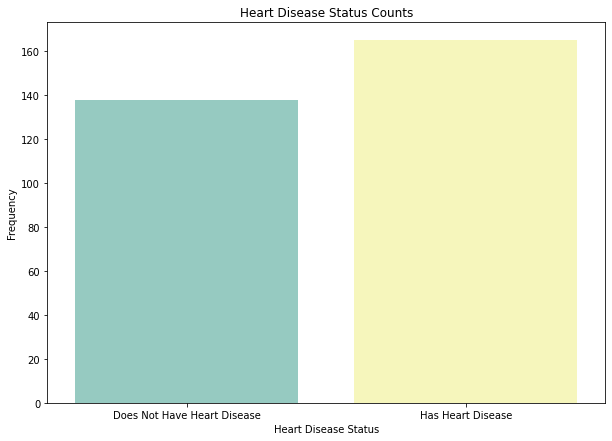

In [ ]:
plt.figure(figsize=(10,7))
hd_count = sns.countplot(x='target', palette='Set3',data=data_df)
plt.xlabel('Heart Disease Status')
plt.ylabel('Frequency')
plt.title('Heart Disease Status Counts')
hd_count.set(xticklabels = ['Does Not Have Heart Disease', 'Has Heart Disease'])
plt.show()

In [ ]:
#locate just the heart disease patients
has_hd = data_df['target'] == 1
percent_hd = round((len(data_df[has_hd.values])/len(data_df))*100, 2)
#investigate the amount of observations with heart disease
print('There are {} observations of 303 total observations, or about {}% of observations, with heart disease.' .format(len(data_df.iloc[has_hd.values]), percent_hd))


There are 165 observations of 303 total observations, or about 54.46% of observations, with heart disease.


### **Heart Disease Status Counts by Gender**

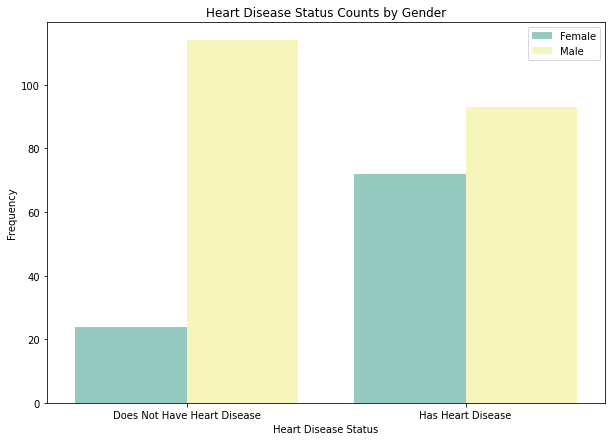

In [ ]:
# count plot on heart disease & gender
plt.figure(figsize=(10,7))
hd_gender = sns.countplot(x = 'target', hue = 'sex', palette='Set3', data = data_df)
plt.xlabel('Heart Disease Status')
plt.ylabel('Frequency')
plt.title('Heart Disease Status Counts by Gender')
hd_gender.set(xticklabels = ['Does Not Have Heart Disease', 'Has Heart Disease'])
hd_gender.legend(['Female', 'Male'])
plt.show()

In [ ]:
female_hd = (data_df['target'] == 1) & (data_df['sex'] == 0)
male_hd = (data_df['target'] == 1) & (data_df['sex'] == 1)
female = data_df['sex']==0
male= data_df['sex']==1
percent_female_hd = round((((len(data_df.iloc[female_hd.values]))/len(data_df.iloc[female.values]))*100),2)
percent_male_hd = round((((len(data_df.iloc[male_hd.values]))/len(data_df.iloc[male.values]))*100),2)
print('Tere are {} females of {} total females, roughly {}%, with heart disease.' .format(len(data_df.iloc[female_hd.values]), len(data_df.iloc[female.values]), percent_female_hd))
print('There are {} males of {} total males, roughly {}%, with heart disease.' .format(len(data_df.iloc[male_hd.values]), len(data_df.iloc[male.values]), percent_male_hd))

Tere are 72 females of 96 total females, roughly 75.0%, with heart disease.
There are 93 males of 207 total males, roughly 44.93%, with heart disease.


### **Is there a significant difference in rates of Heart Disease between genders?**


*   $H_o:$ There is no difference in Heart Disease diagnosis rates between males and females.
*   $H_a:$ There is a difference in Heart Disease diagnosis rates between males and females.

In [ ]:
#create a 2x2 matrix
tab = pd.crosstab(data_df['sex'], data_df['target'])

#conduct fisher exact statistical test
odds_ratio, p_value = fisher_exact(tab)

#view results
if p_value < 0.5:
  print('The p-value {} tells us there is a significant difference in Heart Disease diagnosis between genders.'.format(p_value))
else:
  print('The p-value {} tells us there is no significant difference in Heart Disease diagnosis between genders.'.format(p_value))

The p-value 1.0422375771995582e-06 tells us there is a significant difference in Heart Disease diagnosis between genders.


In [ ]:
#Logistic Regression Model to investiage probabilities

#set target & feature(s) of model
y = data_df.target
x = data_df.sex

#add constant
x = sm.add_constant(x)

#fit model
results = sm.Logit(y, x).fit()

#view results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.648180
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                 0.05948
Time:                        20:30:19   Log-Likelihood:                -196.40
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 6.226e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0986      0.236      4.661      0.000       0.637       1.561
sex           -1.3022      0.

### **Conclusion**

We've seen through visualizations and statistical testing that there is a significant difference between gender and heart disease diagnosis. The logistic regression summary show the likelihood of being diagnosed with heart disease increases by 1.56% when a patient is female.

## **Heart Disease & Maximum Heart Rate Achieved Relationship**  <a name="4"></a>

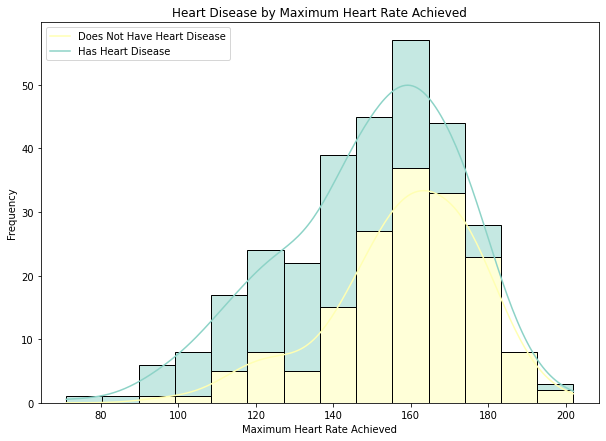

In [ ]:
#distribution of thalach variable with hue of target variable
plt.figure(figsize=(10,7))
ax = sns.histplot(x = 'thalach', hue = 'target', palette='Set3', multiple='stack',
    data = data_df, kde=True)
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.title('Heart Disease by Maximum Heart Rate Achieved')
ax.legend(['Does Not Have Heart Disease', 'Has Heart Disease'])
plt.show()

### **Is the Max Heart Rate Achieved variable normally distributed?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal



In [ ]:
#Is the thalac distribution normal?
t,p=stats.shapiro(data_df['thalach'])

#set up text wrapper for explanation of t-test because the explanation is long
wrapper = textwrap.TextWrapper(width=80)

#explanation of t-testing
if np.round(p, decimals=2) < 0.05:
  ttest_less = 'The p-value of {} is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the thalach variable is not normally distributed.'.format(p, decimals=2)
  ttest_less_str = wrapper.fill(text=ttest_less)
  print(ttest_less_str)
elif np.round(p, decimals=2) > 0.05:
  ttest_more = 'The p-value of {} is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the thalach varaible is not normally distributed.'.format(p, decimals=2)
  ttest_more_str = wrapper.fill(text=ttest_more)
  print(ttest_more_str)

The p-value of 6.620309432037175e-05 is less than 0.05, so we reject the Null
Hypothesis. There is sufficient evidence to support the thalach variable is not
normally distributed.


The sample size of 303 is relatively small, so it's important to also look at skewness and kurtosis. 

In [ ]:
#investigate skewness of thalach variable
thalach_k = np.round(data_df['thalach'].kurtosis(), decimals = 4)
#print explanation of skewness
if thalach_k < 0:
  print('The Kurtosis value of {} tells us the thalach varaible is skewed left.'.format(thalach_k))
elif thalach_k > 0:
  print('The Kurtosis value of {} tells us the thalach variable is skewed right.'.format(thalach_k))

The Kurtosis value of -0.062 tells us the thalach varaible is skewed left.


The Kurtosis is slighlthy smaller than the threshold of 0.05. Paired with a small sample size, it seems reasonable to move forward with t-testing. 

### **Do observations with heart disease have different average max heart rate achieved than those without heart disease?**


*   $H_o:$ There is no difference in the mean of thalach varaible among patients with heart disease and those without.
*   $H_a:$ There is a difference in the mean of the talach variable among patients with heart disease and those without. 

In [ ]:
#split data_df into patients with and without heart disease
has_hd = data_df[(data_df['target'] == 1)]
no_hd = data_df[(data_df['target'] == 0)]
#t-test on thalach varaible for those with and without heart disease
thalach_ttest = stats.ttest_ind(has_hd['thalach'], no_hd['thalach'])

#print explanation of t-test
if thalach_ttest[1]<0.05:
  reject = 'The test statistic of {} and p-value of {} tell us there is a low chance of observing a difference in the means as large as what is oberseved. The test is significant and there is sufficient evidence to support the means are different from each other. In other words, there is sufficient evidence to support rejecting the null hypothesis.'.format(np.round(thalach_ttest[0], decimals=4), thalach_ttest[1])
  reject_str = wrapper.fill(text=reject)
  print(reject_str)
elif thalach_ttest[1]>0.05:
  ftr = 'The test statistic of {} and p-value of {} tell us there is a good chance of observing a difference in the means as large as what is oberseved. The test is not significant and there is not sufficient evidence to support the means are different from each other. In other words, there is not sufficient evidence to support rejecting the null hypothesis.'.format(np.round(thalach_ttest[0], decimals=4), thalach_ttest[1])
  ftr_str = wrapper.fill(text=ftr)
  print(ftr_str)

#print means of each group
print()
print('The mean maximum heart rate reached in patients without heart disease is:', np.round(no_hd['thalach'].mean(), decimals=2))
print()
print('The mean maximum heart rate reached in patients with heart diseas is:', np.round(has_hd['thalach'].mean(), decimals=2))

The test statistic of 8.0697 and p-value of 1.697337638656049e-14 tell us there
is a low chance of observing a difference in the means as large as what is
oberseved. The test is significant and there is sufficient evidence to support
the means are different from each other. In other words, there is sufficient
evidence to support rejecting the null hypothesis.

The mean maximum heart rate reached in patients without heart disease is: 139.1

The mean maximum heart rate reached in patients with heart diseas is: 158.47


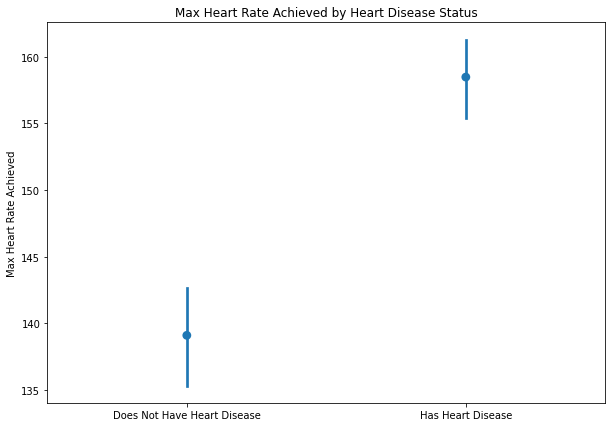

In [ ]:
#visualize difference
plt.figure(figsize=(10,7))
mean_thalach_diff = sns.pointplot(data= [no_hd['thalach'], has_hd['thalach']],
                    join= False)
mean_thalach_diff.set(xticklabels = ['Does Not Have Heart Disease', 'Has Heart Disease'])
plt.ylabel('Max Heart Rate Achieved')
plt.title('Max Heart Rate Achieved by Heart Disease Status')
plt.show()


In [ ]:
#compare descriptive statistics of thalach varaible for patients with & without heart disease
print('-'*2, 'Descriptive Statistics of Max Heart Rate Achieved by Patietns without Heart Disease','-'*2)
print(no_hd['thalach'].describe())

print('-'*2, 'Descriptive Statistics of Max Heart Rate Achieved by Patietns with Heart Disease','-'*2)
print(has_hd['thalach'].describe())

-- Descriptive Statistics of Max Heart Rate Achieved by Patietns without Heart Disease --
count    138.000000
mean     139.101449
std       22.598782
min       71.000000
25%      125.000000
50%      142.000000
75%      156.000000
max      195.000000
Name: thalach, dtype: float64
-- Descriptive Statistics of Max Heart Rate Achieved by Patietns with Heart Disease --
count    165.000000
mean     158.466667
std       19.174276
min       96.000000
25%      149.000000
50%      161.000000
75%      172.000000
max      202.000000
Name: thalach, dtype: float64


In [ ]:
#Logistic Regression Model to investiage probabilities

#set target & feature(s) of model
y = data_df.target
x = data_df.thalach

#add constant
x = sm.add_constant(x)

#fit model
results = sm.Logit(y, x).fit()

#view results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.592833
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.1398
Time:                        13:18:50   Log-Likelihood:                -179.63
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 2.160e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3915      0.987     -6.475      0.000      -8.326      -4.457
thalach        0.0440      0.

### **Conclusion**

We've seen through visualizations and statistical testing the max heart rate achieved is significantly different amongst patients with and without heart disease. The logistic regression summary show how as a patients max heart rate acheived increases by 1 unit, their chance of having heart disease increases by 4.4%.

# **Correlations** <a name="5"></a>

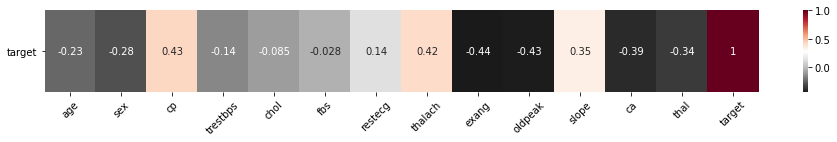

In [ ]:
#investigate correlations between target and remaining varaiables
plt.figure(figsize=(16,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(data_df.corr()).target).T, annot=True, cmap='RdGy_r')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

**Conclusion**

It appears that exercised induced angina has the strongest correlation with heart disease but all correlations are within the -0.5 to 0.5 range. 

# **Relationship Between Age and Heart Disease Status**  <a name="6"></a>

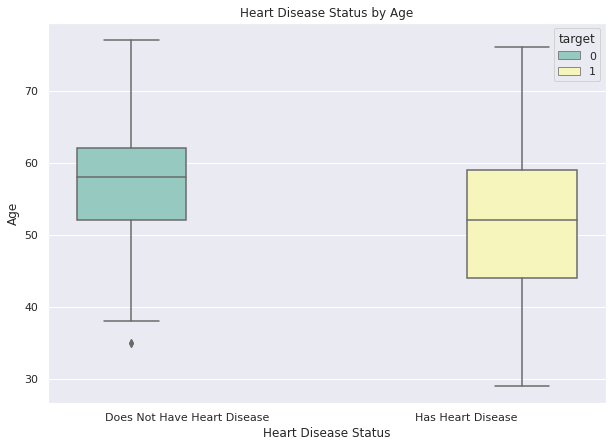

In [ ]:
#How is heart disease spread amongst age?
plt.figure(figsize=(10,7))
age_bp = sns.boxplot(x=data_df['target'], y=data_df['age'], palette='Set3', hue=data_df['target'])
age_bp.set(xticklabels = ['Does Not Have Heart Disease', 'Has Heart Disease'])
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.title('Heart Disease Status by Age')
plt.show()

In [ ]:
#some of the descriptive statistics around age
mean_age = data_df['age'].mean()
min_age = data_df['age'].min()
max_age = data_df['age'].max()

print('The average age of patients in the data is: ', np.round(mean_age, decimals=1))
print('The youngest patient in the data is: ', min_age)
print('The oldest patient in the data is: ', max_age)

The average age of patients in the data is:  54.4
The youngest patient in the data is:  29
The oldest patient in the data is:  77


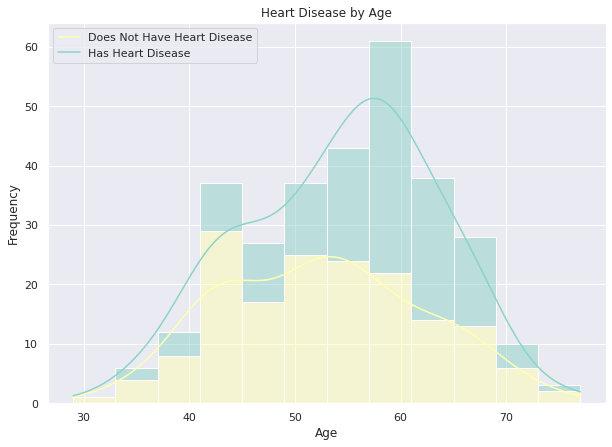

In [ ]:
#distribution of age variable with hue of target variable
plt.figure(figsize=(10,7))
ax = sns.histplot(x = 'age', hue = 'target', palette='Set3', multiple='stack',
    data = data_df, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Heart Disease by Age')
ax.legend(['Does Not Have Heart Disease', 'Has Heart Disease'])
plt.show()

## **Is any one age group more prone to heart disease?**

In [ ]:
#correlation between age & target
age_corr = np.round(data_df['target'].corr(other=data_df['age']), decimals=3)
if age_corr < 0:
  corr_less =  'The Preason Correlation between age and heart disease is {} and tells us the chance of heart disease decreases as age increases.'.format(age_corr)
  corr_less_str = wrapper.fill(text=corr_less)
  print(corr_less_str)
else:
  corr_great = 'The Preason Correlation between age and heart disease is {} and tells us the chance of heart disease increases as age increases.'.format(age_corr)
  corr_great_str = wrapper.fill(text=corr_great)
  print(corr_great_str)

The Preason Correlation between age and heart disease is -0.225 and tells us the
chance of heart disease decreases as age increases.


###**Is the Age amongst patients with and without heart disease normally distributed?**


*  $H_o:$ Distributions are Normal
*   $H_a:$ Distributions are Not Normal



In [ ]:
#It's important to check for normality so we know what kind of statistical
#testing to perform. Test if patients without heart disease's age is normal.
t,p=stats.shapiro(no_hd['age'])

#set up text wrapper for explanation of t-test because the explanation is long
wrapper = textwrap.TextWrapper(width=80)

#explanation of t-testing
if np.round(p, decimals=2) < 0.05:
  ttest_less = 'The p-value for patients without heart disease is {} and is less than 0.05. Therefore, we reject the Null Hypothesis. There is sufficient evidence to support age is not normally distributed.'.format(p, decimals=2)
  ttest_less_str = wrapper.fill(text=ttest_less)
  print(ttest_less_str)
elif np.round(p, decimals=2) > 0.05:
  ttest_more = 'The p-value for patients without heart disease is {} and is greather than 0.05. Therefore, we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport age is not normally distributed.'.format(p, decimals=2)
  ttest_more_str = wrapper.fill(text=ttest_more)
  print(ttest_more_str)

The p-value for patients without heart disease is 0.002868534531444311 and is
less than 0.05. Therefore, we reject the Null Hypothesis. There is sufficient
evidence to support age is not normally distributed.


In [ ]:
# Test if patients with heart disease's age is normal.
t,p=stats.shapiro(has_hd['age'])

#set up text wrapper for explanation of t-test because the explanation is long
wrapper = textwrap.TextWrapper(width=80)

#explanation of t-testing
if np.round(p, decimals=2) < 0.05:
  ttest_less = 'The p-value for patients with heart disease is {} and is less than 0.05. Therefore, we reject the Null Hypothesis. There is sufficient evidence to support age is not normally distributed.'.format(p, decimals=2)
  ttest_less_str = wrapper.fill(text=ttest_less)
  print(ttest_less_str)
elif np.round(p, decimals=2) > 0.05:
  ttest_more = 'The p-value for patients with heart disease is {} and is greather than 0.05. Therefore, we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport age is not normally distributed.'.format(p, decimals=2)
  ttest_more_str = wrapper.fill(text=ttest_more)
  print(ttest_more_str)

The p-value for patients with heart disease is 0.12112646549940109 and is
greather than 0.05. Therefore, we fail to reject the Null Hypothesis. There is
not sufficient evidence to suuport age is not normally distributed.


We can see that the distribution of ages for patients without heart disease is not the same distribution as for the ages of patients with heart disease so we will have to perform some non-parametric testing to investigate if the mean age of those with and without heart disease is the same.

### **Do observations with heart disease have different average age than those without heart disease?**


*   $H_o:$ There is no difference in the mean age among patients with heart disease and those without.
*   $H_a:$ There is a difference in the mean age among patients with heart disease and those without. 

In [ ]:
#Mann-Whitney U Test
mann_whitneyu = stats.mannwhitneyu(no_hd['age'],has_hd['age'])

#print explanation of t-test
if mann_whitneyu[1]<0.05:
  reject = 'The test statistic of {} and p-value of {} tell us there is a low chance of observing a difference in the means as large as what is oberseved. The test is significant and there is sufficient evidence to support the mean ages of patients with and without heart disease are different from each other. In other words, there is sufficient evidence to support rejecting the null hypothesis.'.format(np.round(thalach_ttest[0], decimals=4), thalach_ttest[1])
  reject_str = wrapper.fill(text=reject)
  print(reject_str)
else:
  ftr = 'The test statistic of {} and p-value of {} tell us there is a good chance of observing a difference in the means as large as what is oberseved. The test is not significant and there is not sufficient evidence to support the mean ages with and without heart disease are different from each other. In other words, there is not sufficient evidence to support rejecting the null hypothesis.'.format(np.round(thalach_ttest[0], decimals=4), thalach_ttest[1])
  ftr_str = wrapper.fill(text=ftr)
  print(ftr_str)

#print means of each group
print()
print('The mean age in patients without heart disease is:', np.round(no_hd['age'].mean(), decimals=2))
print()
print('The mean age in patients with heart diseas is:', np.round(has_hd['age'].mean(), decimals=2))

The test statistic of 8.0697 and p-value of 1.697337638656049e-14 tell us there
is a low chance of observing a difference in the means as large as what is
oberseved. The test is significant and there is sufficient evidence to support
the mean ages of patients with and without heart disease are different from each
other. In other words, there is sufficient evidence to support rejecting the
null hypothesis.

The mean age in patients without heart disease is: 56.6

The mean age in patients with heart diseas is: 52.5


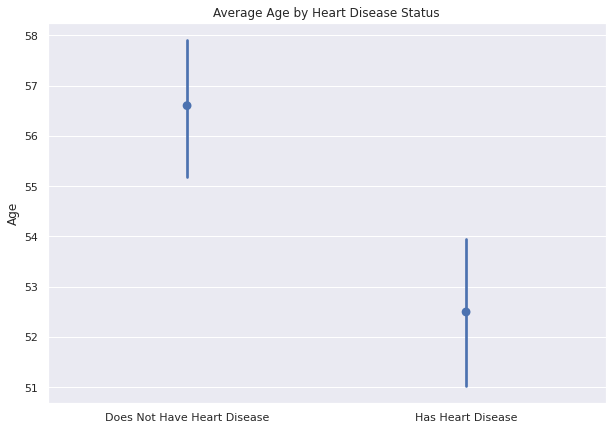

In [ ]:
#visualize difference
plt.figure(figsize=(10,7))
mean_age_diff = sns.pointplot(data= [no_hd['age'], has_hd['age']],
                    join= False)
mean_age_diff.set(xticklabels = ['Does Not Have Heart Disease', 'Has Heart Disease'])
mean_age_diff.set(ylabel='Age')
plt.title('Average Age by Heart Disease Status')
plt.show()

In [ ]:
#Logistic Regression Model to investiage probabilities

#set target & feature(s) of model
y = data_df.target
x = data_df.age

#add constant
x = sm.add_constant(x)

#fit model
results = sm.Logit(y, x).fit()

#view results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.663138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                 0.03778
Time:                        13:18:51   Log-Likelihood:                -200.93
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.128e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0362      0.756      4.014      0.000       1.554       4.519
age           -0.0524      0.

## **Conclusion**

We've seen through visualizations and statistical testing that age is significantly different amongst patients with and without heart disease. The logistic regression summary shows us that as a patients increases by 1 year, after age 29, their chance of having heart disease decreases by 5.2%.

In this light, it means that patients in younger age groups, are somewhat more likely to have heart disease than those in elder age groups. 

This might be attributed to the fact that if you live longer, you made it to an elder age by escaping disease. 

# **Explore Chest Pain**  <a name="7"></a>

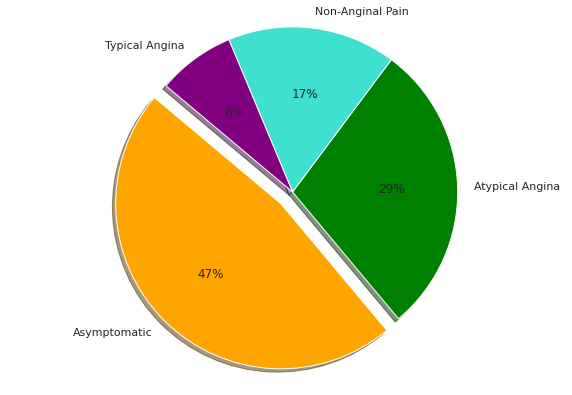

In [ ]:
#What kind of chest pain did patients experience most?
plt.figure(figsize=(10,7))
labels = 'Asymptomatic', 'Atypical Angina', 'Non-Anginal Pain', 'Typical Angina'
counts = list(data_df['cp'].value_counts().values)
colors = ['orange', 'green', 'turquoise', 'purple']
explode = (0.1, 0, 0, 0) #explode largest slice
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', 
        shadow= True, startangle = 140)
plt.axis('equal')
plt.show()

Patients were most often asymptomatic in chest pain and if they were experiencing chest pain, it was most commonly Atypical Angina. 

# **Classification Model Testing**  <a name="8"></a>

## **Prep Work for Supervised Learning Models** <a name="9"></a>

In [ ]:
#set features & targets
X=data_df.drop(['target'],1)
y= data_df['target']
y = y.astype(int)

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

#view shapes of training and test sets
print('X_train shape: ', X_train.shape)
print('y-train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (212, 13)
y-train shape:  (212,)
X_test shape:  (91, 13)
y_test shape:  (91,)


In [ ]:
#standardize the data
scaler = StandardScaler()

#fit training set
scaler.fit(X_train)
scaler.fit(X_test)

#apply transformation to training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### **Model 1: Logistic Regression with 5 Fold Cross Validation**  <a name="10"></a>

In [ ]:
#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001,0.01,0.1,1,10,100],
 'penalty': ['l1','l2','elasticnet','none'],
 'solver': ['lbfgs', 'liblinear'],
 'multi_class':['ovr'],
 'max_iter': [1000],
 'random_state': [52]}  
  
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 0.01, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 52, 'solver': 'lbfgs'}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=52, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.4s finished


In [ ]:
#Instanstiate LogisticRegression classifier
lr_clf = LogisticRegression(C= 0.01, penalty='l2', solver = 'lbfgs', multi_class = 'ovr', max_iter=1000)
lr_clf.fit(X_train, y_train)

#cross validate
lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.86046512 0.76744186 0.73809524 0.95238095 0.83333333]
Mean Cross Validation Score: 0.830343300110741977526629398198565


In [ ]:
#generate predictions
lr_preds = lr_clf.predict(X_test)

#get score report on predictions
lr_report = classification_report(y_test, lr_preds)
print(lr_report)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        42
           1       0.77      0.94      0.84        49

    accuracy                           0.81        91
   macro avg       0.83      0.80      0.81        91
weighted avg       0.83      0.81      0.81        91



In [ ]:
#more performance metrics
lr_score_train = lr_clf.score(X_train, y_train)
lr_score_test = lr_clf.score(X_test, y_test)
lr_prec_test = precision_score(y_test, lr_preds, average='weighted')
lr_recall_test = recall_score(y_test, lr_preds, average='weighted')
lr_f1_test = f1_score(y_test, lr_preds, average='weighted')
lr_rsquared_train = lr_clf.score(X_train, y_train)
lr_rsquared_test = lr_clf.score(X_test, y_test)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mse(y_test, lr_preds)
lr_rmse = rmse(y_test, lr_preds)

#create easily readable display of performance metrics
lr_dictionary = {'Training Set Accuracy': lr_score_train, 
  'Test Set Accuracy': lr_score_test, 'Testing Set Precision': lr_prec_test, 
  'Testing Set Recall': lr_recall_test, 'Testing Set F1':lr_f1_test, 
  'Training Set R Squared': lr_rsquared_train, 
  'Test Set R Squared': lr_rsquared_test, 'Mean Absolute Error': lr_mae, 
  'Mean Sqaured Error': lr_mse, 'Root Mean Squared Error': lr_rmse}

lr_df = pd.DataFrame(lr_dictionary, index=[0])

lr_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.839623,0.813187,0.829694,0.813187,0.808538,0.839623,0.813187,0.186813,0.186813,0.432219


###**Model 2: Random Forest Classifier with 5 Fold Cross Validation**  <a name="11"></a>

In [ ]:
#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
 'random_state': [52]}  
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 2376 candidates, totalling 11880 fits


[Parallel(n_jobs=1)]: Done 11880 out of 11880 | elapsed: 23.8min finished


{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 180, 'random_state': 52}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)


In [ ]:
#Instanstiate RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators= 180, min_samples_split=2, 
        min_samples_leaf= 4, max_features= 'auto', max_depth=10, bootstrap= True,
        random_state = 52)
rf_clf.fit(X_train, y_train)

#cross validate
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', rf_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(rf_cv_scores)))

Accuracy Scores for the 5 folds:  [0.8372093  0.81395349 0.76190476 0.95238095 0.83333333]
Mean Cross Validation Score: 0.839756367663344382989976111275610


In [ ]:
#generate predictions
rf_preds = rf_clf.predict(X_test)

#get score report on predictions
rf_report = classification_report(y_test, rf_preds)
print(rf_report)

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        42
           1       0.79      0.90      0.84        49

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [ ]:
#more performance metrics
rf_score_train = rf_clf.score(X_train, y_train)
rf_score_test = rf_clf.score(X_test, y_test)
rf_prec_test = precision_score(y_test, rf_preds, average='weighted')
rf_recall_test = recall_score(y_test, rf_preds, average='weighted')
rf_f1_test = f1_score(y_test, rf_preds, average='weighted')
rf_rsquared_train = rf_clf.score(X_train, y_train)
rf_rsquared_test = rf_clf.score(X_test, y_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mse(y_test, rf_preds)
rf_rmse = rmse(y_test, rf_preds)
rf_mape = np.mean(np.abs((y_test - rf_preds)/y_test)*100)

#create easily readable display of performance metrics
rf_dictionary = {'Training Set Accuracy': rf_score_train, 
  'Test Set Accuracy': rf_score_test, 'Testing Set Precision': rf_prec_test, 
  'Testing Set Recall': rf_recall_test, 'Testing Set F1':rf_f1_test,
 'Training Set R Squared': rf_rsquared_train, 
  'Test Set R Squared': rf_rsquared_test, 'Mean Absolute Error': rf_mae, 
  'Mean Sqaured Error': rf_mse, 'Root Mean Squared Error': rf_rmse}

rf_df = pd.DataFrame(rf_dictionary, index=[0])

rf_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.919811,0.813187,0.818681,0.813187,0.810922,0.919811,0.813187,0.186813,0.186813,0.432219


### **Model 3: K Nearest Neighbors with 5 Fold Cross Validation**  <a name="12"></a>

In [ ]:
#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [3,5,10,15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (10):
  K = K+1
  model = neighbors.KNeighborsClassifier(n_neighbors = K, metric='manhattan')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)



RMSe Value for K=  1 is  0.4916891718944416
RMSe Value for K=  2 is  0.4803844614152614
RMSe Value for K=  3 is  0.4447495899966607
RMSe Value for K=  4 is  0.4447495899966607
RMSe Value for K=  5 is  0.40599897147057507
RMSe Value for K=  6 is  0.4447495899966607
RMSe Value for K=  7 is  0.4322189107537832
RMSe Value for K=  8 is  0.4322189107537832
RMSe Value for K=  9 is  0.4193139346887673
RMSe Value for K=  10 is  0.40599897147057507


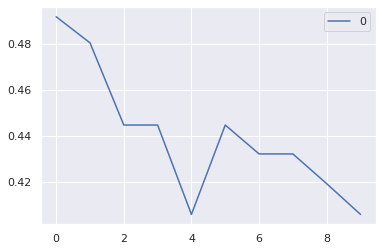

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal number of neighbors from above
knn_clf = neighbors. KNeighborsClassifier(n_neighbors =5, metric='manhattan')
knn_clf.fit(X_train, y_train)

#cross validate
knn_cv_scores = cross_val_score(knn_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', knn_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(knn_cv_scores)))

Accuracy Scores for the 5 folds:  [0.79069767 0.81395349 0.83333333 0.92857143 0.92857143]
Mean Cross Validation Score: 0.859025470653377754004509370133746


In [ ]:
#generate predictions
knn_preds = knn_clf.predict(X_test)

#get score report on predictions
knn_report = classification_report(y_test, knn_preds)
print(knn_report)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        42
           1       0.81      0.90      0.85        49

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [ ]:
#more performance metrics
knn_score_train = knn_clf.score(X_train, y_train)
knn_score_test = knn_clf.score(X_test, y_test)
knn_prec_test = precision_score(y_test, knn_preds, average='weighted')
knn_recall_test = recall_score(y_test, knn_preds, average='weighted')
knn_f1_test = f1_score(y_test, knn_preds, average='weighted')
knn_rsquared_train = knn_clf.score(X_train, y_train)
knn_rsquared_test = knn_clf.score(X_test, y_test)
knn_mae = mean_absolute_error(y_test, knn_preds)
knn_mse = mse(y_test, knn_preds)
knn_rmse = rmse(y_test, knn_preds)
knn_mape = np.mean(np.abs((y_test - knn_preds)/y_test)*100)

#create easily readable display of performance metrics
knn_dictionary = {'Training Set Accuracy': knn_score_train, 
  'Test Set Accuracy': knn_score_test, 'Testing Set Precision': knn_prec_test, 
  'Testing Set Recall': knn_recall_test, 'Testing Set F1':knn_f1_test,
 'Training Set R Squared': knn_rsquared_train, 
  'Test Set R Squared': knn_rsquared_test, 'Mean Absolute Error': knn_mae, 
  'Mean Sqaured Error': knn_mse, 'Root Mean Squared Error': knn_rmse,
  'Mean Absolute Percentage Error': knn_mape}

knn_df = pd.DataFrame(knn_dictionary, index=[0])

knn_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,0.896226,0.835165,0.837915,0.835165,0.833949,0.896226,0.835165,0.164835,0.164835,0.405999,inf


### **Model 4: Support Vector Machine with 5 Fold Cross Validation**  <a name="13"></a>

In [ ]:
#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear'],
              'decision_function_shape': ['ovo','ovr']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 100, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   59.5s finished


In [ ]:
#set model with ideal number of neighbors from above
svm_clf = svm.SVC(kernel = 'linear', C=100, gamma= 1, 
            decision_function_shape='ovo', random_state=52)
svm_clf.fit(X_train, y_train)

#cross validate
svm_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', svm_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(svm_cv_scores)))

Accuracy Scores for the 5 folds:  [0.88372093 0.76744186 0.78571429 0.97619048 0.78571429]
Mean Cross Validation Score: 0.839756367663344382989976111275610


In [ ]:
#generate predictions
svm_preds = svm_clf.predict(X_test)

#get score report on predictions
svm_report = classification_report(y_test, svm_preds)
print(svm_report)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        42
           1       0.81      0.94      0.87        49

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



In [ ]:
#more performance metrics
svm_score_train = svm_clf.score(X_train, y_train)
svm_score_test = svm_clf.score(X_test, y_test)
svm_prec_test = precision_score(y_test, svm_preds, average='weighted')
svm_recall_test = recall_score(y_test, svm_preds, average='weighted')
svm_f1_test = f1_score(y_test, svm_preds, average='weighted')
svm_rsquared_train = svm_clf.score(X_train, y_train)
svm_rsquared_test = svm_clf.score(X_test, y_test)
svm_mae = mean_absolute_error(y_test, svm_preds)
svm_mse = mse(y_test, svm_preds)
svm_rmse = rmse(y_test, svm_preds)
svm_mape = np.mean(np.abs((y_test - svm_preds)/y_test)*100)

#create easily readable display of performance metrics
svm_dictionary = {'Training Set Accuracy': svm_score_train, 
  'Test Set Accuracy': svm_score_test, 'Testing Set Precision': svm_prec_test, 
  'Testing Set Recall': svm_recall_test, 'Testing Set F1':svm_f1_test,
  'Training Set R Squared': svm_rsquared_train, 
  'Test Set R Squared': svm_rsquared_test,'Mean Absolute Error': svm_mae, 
  'Mean Sqaured Error': svm_mse,  'Root Mean Squared Error': svm_rmse}

svm_df = pd.DataFrame(svm_dictionary, index=[0])

svm_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.863208,0.846154,0.855362,0.846154,0.843862,0.863208,0.846154,0.153846,0.153846,0.392232


### **Model 5: Gradient Boosting with 5 Fold Cross Validation**  <a name="14"></a>

In [ ]:
#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 1000],
          'max_depth': [2, 3, 4, 5],
          'loss': ['deviance', 'exponential'],
          'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
          'max_features':[None, 'auto', 2, 3, 4, 5],
          'random_state':[52]}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, refit=True, verbose=1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'max_features': 2, 'n_estimators': 200, 'random_state': 52}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=52, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


[Parallel(n_jobs=1)]: Done 7200 out of 7200 | elapsed: 21.3min finished


In [ ]:
#set model parameters
params = {'n_estimators': 200,
          'max_depth': 2,
          'loss': 'exponential',
          'learning_rate':0.1, 
          'max_features':2,
          'random_state':52}

#set model 
gb_clf = ensemble.GradientBoostingClassifier(**params)
gb_clf.fit(X_train, y_train)

#cross validate
gb_cv_scores = cross_val_score(gb_clf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', gb_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(gb_cv_scores)))

Accuracy Scores for the 5 folds:  [0.8372093  0.74418605 0.78571429 0.95238095 0.85714286]
Mean Cross Validation Score: 0.835326688815060891535324572032550


In [ ]:
#generate predictions
gb_preds = gb_clf.predict(X_test)

#get score report on predictions
gb_report = classification_report(y_test, gb_preds)
print(gb_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [ ]:
#more performance metrics
gb_score_train = gb_clf.score(X_train, y_train)
gb_score_test = gb_clf.score(X_test, y_test)
gb_prec_test = precision_score(y_test, gb_preds, average='weighted')
gb_recall_test = recall_score(y_test, gb_preds, average='weighted')
gb_f1_test = f1_score(y_test, gb_preds, average='weighted')
gb_rsquared_train = gb_clf.score(X_train, y_train)
gb_rsquared_test = gb_clf.score(X_test, y_test)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_mse = mse(y_test, gb_preds)
gb_rmse = rmse(y_test, gb_preds)
gb_mape = np.mean(np.abs((y_test - gb_preds)/y_test)*100)

#create easily readable display of performance metrics
gb_dictionary = {'Training Set Accuracy': gb_score_train, 
  'Test Set Accuracy': gb_score_test, 'Testing Set Precision': gb_prec_test, 
  'Testing Set Recall': gb_recall_test, 'Testing Set F1':gb_f1_test,
 'Training Set R Squared': gb_rsquared_train, 
  'Test Set R Squared': gb_rsquared_test,'Mean Absolute Error': gb_mae, 
  'Mean Sqaured Error': gb_mse, 'Root Mean Squared Error': gb_rmse}

gb_df = pd.DataFrame(gb_dictionary, index=[0])

gb_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.971698,0.835165,0.835047,0.835165,0.835004,0.971698,0.835165,0.164835,0.164835,0.405999


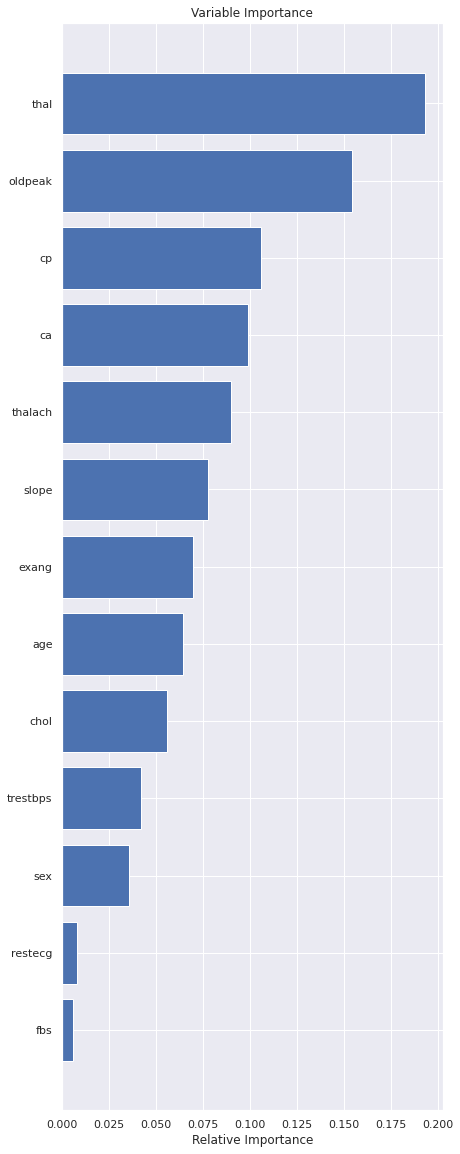

In [ ]:
#feature importance
feature_importance = gb_clf.feature_importances_

#make importances relative to max importance
plt.figure(figsize=(15,20))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### **Model 6: Ridge Classifier with 5 Fold Cross Validation**  <a name="15"></a>

In [ ]:
#Tuning Regularization Parameter
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

#set model with ideal number of neighbors from above
ridge_clf = RidgeClassifierCV(alphas= alphas, cv = 5)
ridge_clf.fit(X_train, y_train)

#cross validate
ridge_cv_scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)

print('Best alpha value is: {}'.format(ridge_clf.alpha_))
print('Accuracy Scores for the 5 folds: ', ridge_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(ridge_cv_scores)))

Best alpha value is: 10.0
Accuracy Scores for the 5 folds:  [0.88372093 0.76744186 0.78571429 0.97619048 0.78571429]
Mean Cross Validation Score: 0.839756367663344382989976111275610


In [ ]:
#generate predictions
ridge_preds = ridge_clf.predict(X_test)

#get score report on predictions
ridge_report = classification_report(y_test, ridge_preds)
print(ridge_report)

              precision    recall  f1-score   support

           0       0.91      0.69      0.78        42
           1       0.78      0.94      0.85        49

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.84      0.82      0.82        91



In [ ]:
#more performance metrics
ridge_score_train = ridge_clf.score(X_train, y_train)
ridge_score_test = ridge_clf.score(X_test, y_test)
ridge_prec_test = precision_score(y_test, ridge_preds, average='weighted')
ridge_recall_test = recall_score(y_test, ridge_preds, average='weighted')
ridge_f1_test = f1_score(y_test, ridge_preds, average='weighted')
ridge_rsquared_train = ridge_clf.score(X_train, y_train)
ridge_rsquared_test = ridge_clf.score(X_test, y_test)
ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_mse = mse(y_test, ridge_preds)
ridge_rmse = rmse(y_test, ridge_preds)
ridge_mape = np.mean(np.abs((y_test - ridge_preds)/y_test)*100)

#create easily readable display of performance metrics
ridge_dictionary = {'Training Set Accuracy': ridge_score_train, 
  'Test Set Accuracy': ridge_score_test, 'Testing Set Precision': ridge_prec_test, 
  'Testing Set Recall': ridge_recall_test, 'Testing Set F1':ridge_f1_test,
 'Training Set R Squared': ridge_rsquared_train, 
  'Test Set R Squared': ridge_rsquared_test,'Mean Absolute Error': ridge_mae, 
  'Mean Sqaured Error': ridge_mse,  'Root Mean Squared Error': ridge_rmse}

ridge_df = pd.DataFrame(ridge_dictionary, index=[0])

ridge_df

,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error
0,0.839623,0.824176,0.838087,0.824176,0.820436,0.839623,0.824176,0.175824,0.175824,0.419314


## **Model Comparisons**  <a name="16"></a>

In [ ]:
#create list of models
clf_results_list = [lr_df, rf_df, knn_df, svm_df, gb_df, ridge_df]

clf_results_df = pd.concat(clf_results_list)

In [ ]:
#reset index twice so renaming a column with model names is possible next.
clf_results_df.reset_index(inplace=True)
clf_results_df.reset_index(inplace=True)

In [ ]:
#add model name to level_0 for clf_results_df
clf_results_df.loc[clf_results_df['level_0']==0, 'level_0']='LR Classifier'
clf_results_df.loc[clf_results_df['level_0']==1, 'level_0']='RF Classifier'
clf_results_df.loc[clf_results_df['level_0']==2, 'level_0']='KNN Classifier'
clf_results_df.loc[clf_results_df['level_0']==3, 'level_0']='SVM Classifier'
clf_results_df.loc[clf_results_df['level_0']==4, 'level_0']='Gradient Boosting Classifier'
clf_results_df.loc[clf_results_df['level_0']==5, 'level_0']='Ridge Classifier'
clf_results_df.rename(columns={'level_0': 'Model'}, inplace=True)

In [ ]:
clf_results_df

,Model,index,Training Set Accuracy,Test Set Accuracy,Testing Set Precision,Testing Set Recall,Testing Set F1,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,LR Classifier,0,0.839623,0.813187,0.829694,0.813187,0.808538,0.839623,0.813187,0.186813,0.186813,0.432219,NaN
1,RF Classifier,0,0.919811,0.813187,0.818681,0.813187,0.810922,0.919811,0.813187,0.186813,0.186813,0.432219,NaN
2,KNN Classifier,0,0.896226,0.835165,0.837915,0.835165,0.833949,0.896226,0.835165,0.164835,0.164835,0.405999,inf
3,SVM Classifier,0,0.863208,0.846154,0.855362,0.846154,0.843862,0.863208,0.846154,0.153846,0.153846,0.392232,NaN
4,Gradient Boosting Classifier,0,0.971698,0.835165,0.835047,0.835165,0.835004,0.971698,0.835165,0.164835,0.164835,0.405999,NaN
5,Ridge Classifier,0,0.839623,0.824176,0.838087,0.824176,0.820436,0.839623,0.824176,0.175824,0.175824,0.419314,NaN


## **Conclusion**  <a name="17"></a>

The SVM model performed best on the test set and had the highest degree of precision. This is important because it means it correctly identifies heart disease the best out of the models. 

#**Deployment of Model** <a name="18"></a>

##**Create user based form to ingest data of all features from a user.** <a name="19"></a>

In [ ]:
User_Age = 67 #@param {type:"integer"}
Sex = "Male" #@param ["Male", "Female"]
if 'Male':
  sex = 1
else:
  sex = 0
Chest_Pain = "Asymptomatic" #@param ["Asymptomatic", "Atypical Angina", "Non-Anginal Pain", "Typical Angina"]
if 'Asymptomatic':
  Chest_Pain = 0
elif 'Atypical Angina':
  Chest_Pain = 1
elif 'Non-Anginal Pain':
  Chest_Pain = 2
else:
  Chest_Pain = 3
Resting_Blood_Pressure = 160 #@param {type:"slider", min:90, max:200, step:1}
serum_cholesterol = 280 #@param {type:"slider", min:100, max:500, step:1}
fasting_blood_sugar = "\u003C 120 mg/dl" #@param ["> 120 mg/dl", "\u003C 120 mg/dl"]
if '> 120 mg/dl':
  fasting_blood_sugar = 1
else:
  fasting_blood_sugar = 0
resting_ect = "Normal" #@param ["Showing probable or definite left ventricular hypertrophy by Estes\u2019 criteria.", "Normal", "Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV"]
if 'Showing probable or definite left ventricular hypertrophy by Estes’ criteria.':
  resting_ect = 0
elif 'Normal':
  resting_ect = 1
else:
  resting_ect = 2
max_hr_achieved = 105 #@param {type:"slider", min:60, max:220, step:1}
exercise_induced_angina = "Yes" #@param ["Yes", "No"]
if 'Yes':
  exercise_induced_angina = 1
else:
  exercise_induced_angina = 0
old_peak = 1.5 #@param {type:"slider", min:0, max:6.5, step:0.1}
slope = "Flat" #@param ["Downsloping", "Flat", "Upsloping"]
if 'Downsloping':
  slope = 0
elif 'Flat':
  slope = 1
else:
  slope = 2
num_major_vessels = "3" #@param ["0", "1", "2", "3"]
thal = "2" #@param ["0", "1", "2", "3"]

In [ ]:
#Calculate results from user submitted form. 

#define a submit button
button = widgets.Button(description='Submit')

#define outout
output = widgets.Output()

#define a function to interpret user results and make prediction through model
def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    #define input
    new_input = [[User_Age,sex,Chest_Pain,Resting_Blood_Pressure,serum_cholesterol,fasting_blood_sugar,resting_ect,max_hr_achieved,exercise_induced_angina,old_peak,slope,num_major_vessels,thal]]
    #pass new input through svm model
    new_output = svm_clf.predict(new_input)
    #display detection of heart disease or not depending upon model prediction
    if new_output == 0:
      print('Congratulations, no heart disease detected.')
    else:
      print('Sorry, heart disease has been detected.')

#run function
button.on_click(on_button_clicked)
display(button, output)

Button(description='Submit', style=ButtonStyle())

Output()

## **Flask User Input to Determine Heart Disease Status** <a name="20"></a>

In [ ]:
app = Flask(__name__) #creates flask app

run_with_ngrok(app)   #starts ngrok when the app is run

@app.route("/") #map URL with task to perform

#create a function to determine heart disease status through flask app
def hd_status():
   new_input = [[User_Age,sex,Chest_Pain,Resting_Blood_Pressure,serum_cholesterol,fasting_blood_sugar,resting_ect,max_hr_achieved,exercise_induced_angina,old_peak,slope,num_major_vessels,thal]]
   new_output = svm_clf.predict(new_input)
   new_output = new_output.astype(str)
   if new_output == '0':
      return 'Congratulations, no heart disease detected.'
   else:
     return 'Sorry, heart disease has been detected.'
 
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c344121376d4.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [27/Jan/2021 15:34:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Jan/2021 15:34:39] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
#function to view the output of the flask output in this notebook
def display(port, height):
    shell = """
        (async () => {
            const url = await google.colab.kernel.proxyPort(%PORT%, {"cache": true});
            const iframe = document.createElement('iframe');
            iframe.src = url;
            iframe.setAttribute('width', '100%');
            iframe.setAttribute('height', '%HEIGHT%');
            iframe.setAttribute('frameborder', 0);
            document.body.appendChild(iframe);
        })();
    """
    replacements = [
        ("%PORT%", "%d" % port),
        ("%HEIGHT%", "%d" % height),
    ]
    for (k, v) in replacements:
        shell = shell.replace(k, v)

    script = IPython.display.Javascript(shell)
    IPython.display.display(script)

display(6060, 100)

<IPython.core.display.Javascript object>